In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("adult.csv")
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K


In [ ]:
# Randomly print 50 percent of data
# ,random_state=11) if we use so every time same generate hoga
df.sample(frac=0.5)

In [4]:
# Check null values

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         1
relationship       1
race               1
gender             1
capital-gain       1
capital-loss       1
hours-per-week     1
native-country     1
income             1
dtype: int64

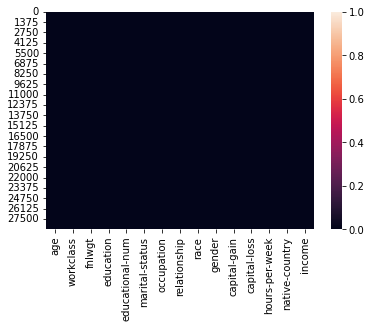

In [12]:
# If missing values is there lighter color will be shown

sns.heatmap(df.isnull())

In [13]:
# check which has ? in them

df.isin(['?']).sum()

age                   0
workclass          1695
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1700
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      497
income                0
dtype: int64

In [23]:
# Perform data cleaning...replace ? with Nan

df.replace("okish",np.nan)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28850,25,Private,66935,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,35.0,United-States,<=50K
28851,20,Private,344278,11th,7,Separated,Other-service,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
28852,29,Private,108574,Assoc-voc,11,Never-married,Priv-house-serv,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
28853,56,Private,244605,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


In [24]:
df["workclass"]=df["workclass"].replace("okish",np.nan)
df["workclass"]

0          Private
1          Private
2        Local-gov
3          Private
4              NaN
           ...    
28850      Private
28851      Private
28852      Private
28853      Private
28854      Private
Name: workclass, Length: 28855, dtype: object

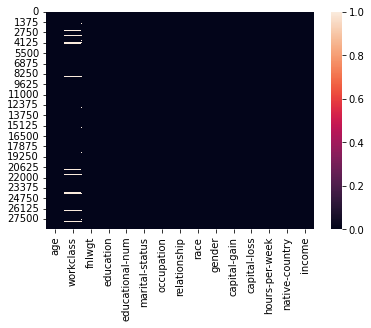

In [25]:
# Now we have null values...so we can visualize null values
# as workclass has a lot nan in them
sns.heatmap(df.isnull())

In [27]:
# drop all missing values

per_miss=df.isnull().sum()*100/len(df)

print(per_miss)

age                0.000000
workclass          5.874199
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.003466
relationship       0.003466
race               0.003466
gender             0.003466
capital-gain       0.003466
capital-loss       0.003466
hours-per-week     0.003466
native-country     0.003466
income             0.003466
dtype: float64


In [30]:
# using how="many" it means ki jitne bhi rows aari hai...we can compare shape before and after drop of missing values...means we can calculate how much rows had missing values

df.dropna(how="any",inplace=True)

df.shape

(27159, 15)

In [32]:
# Check for duplicates and drop them

dup=df.duplicated().any()

dup

True

In [34]:
df=df.drop_duplicates()

df.shape

(27143, 15)

In [35]:
27159-27143
# 16 rows had duplicates in them

16

In [36]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,27143.000000,2.714300e+04,27143.000000,27143.000000,27143.000000,27143.000000
mean,38.599086,1.898551e+05,10.124268,1114.516413,89.540250,40.990163
std,13.235672,1.051427e+05,2.554886,7634.475169,405.675858,11.975398
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175845e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782550e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.385980e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
# 75 percent values in capital_gain and capital_loss is zero...so drop it


In [42]:

df.drop(["capital-loss","educational-num","capital-gain"],axis=1)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40.0,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
28849,53,Local-gov,204447,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,43.0,United-States,>50K
28850,25,Private,66935,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,35.0,United-States,<=50K
28851,20,Private,344278,11th,Separated,Other-service,Own-child,White,Female,40.0,United-States,<=50K
28852,29,Private,108574,Assoc-voc,Never-married,Priv-house-serv,Own-child,White,Female,40.0,United-States,<=50K


# ***Univariate analysis***

In [43]:
# What is distribution of age column

df["age"].describe()

count    27143.000000
mean        38.599086
std         13.235672
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

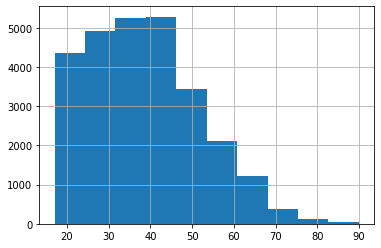

In [44]:
# as 75% values are below 47...we can see in histogram
df["age"].hist()

In [48]:
# find total number of persons having age between 17 to 48(inclusive) between method

len(df[(df["age"]>=17) & (df["age"]<=48)])

20971

In [47]:
len(df[df["age"].between(17,48)])

20971

In [49]:
# What is distribution of workclass column

df["workclass"].describe()

count       27143
unique          8
top       Private
freq        19933
Name: workclass, dtype: object

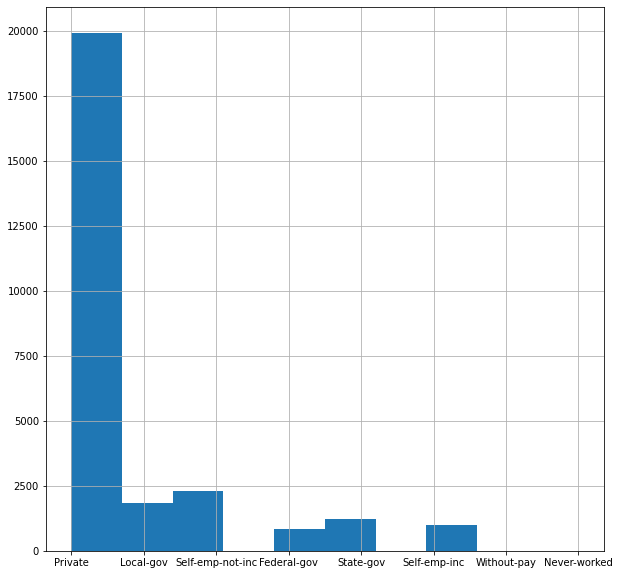

In [54]:
plt.figure(figsize=(10,10))
df["workclass"].hist()

In [75]:
# How many person have bachelors as their masters degree or bachelors degree

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [67]:
len(df[ (df["education"]=="Bachelors") | (df["education"]=="Masters") ])

6134

In [71]:
df[df["education"].isin(['Bachelors',"Masters"])]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
20,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0.0,47.0,United-States,>50K
23,25,Private,220931,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,43.0,Peru,<=50K
24,25,Private,205947,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28836,46,Private,122026,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,44.0,United-States,>50K
28841,34,Private,303187,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,?,>50K
28844,52,Self-emp-not-inc,63004,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,Philippines,<=50K
28846,42,Private,211450,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,45.0,United-States,>50K


In [68]:
df[ (df["education"]=="Bachelors") | (df["education"]=="Masters")]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
20,34,Private,107914,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0.0,47.0,United-States,>50K
23,25,Private,220931,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,43.0,Peru,<=50K
24,25,Private,205947,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28836,46,Private,122026,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,44.0,United-States,>50K
28841,34,Private,303187,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,?,>50K
28844,52,Self-emp-not-inc,63004,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,Philippines,<=50K
28846,42,Private,211450,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,45.0,United-States,>50K


In [ ]:
a=df["education"]=="Masters"
b=df["education"]=="Bachelors"

In [64]:
len(df[a | b])

6134

Bivariate analysis

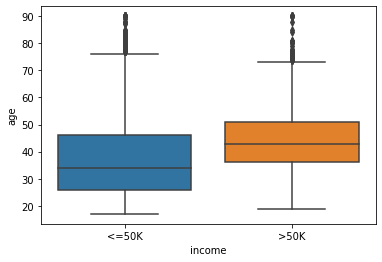

In [74]:
# relationship between salary and age

sns.boxplot(x="income",y="age" ,data=df)
# this shows young people have low salary as compared to aged people

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


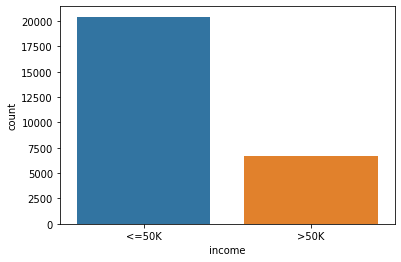

In [77]:
sns.countplot("income",data=df)

In [76]:
# replace salary values <=50k , >50k with 0 and 1 

df["income"].value_counts()

<=50K    20437
>50K      6706
Name: income, dtype: int64

In [88]:
def replace1(i):
  if i=="<=50K":
    return 0
  else:
    return 1


df["encode_income"]=df["income"].apply(replace1)
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encode_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K,0


In [102]:
# second method

df.replace(to_replace=["<=50K",">50K"],value=["50k","60K"],inplace=True)
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encode_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,50k,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,50k,0


In [91]:
df["hours-per-week"].max()

99.0

In [100]:
df[df["hours-per-week"].max()==df["hours-per-week"]]["workclass"].value_counts()


Private             30
Self-emp-not-inc    21
Self-emp-inc        10
Local-gov            3
State-gov            2
Federal-gov          1
Name: workclass, dtype: int64

In [108]:
# How many are black females

df[(df["gender"]=="Female") & (df["race"]=="Black")]["workclass"].value_counts()



Private             928
Local-gov           131
State-gov            85
Federal-gov          66
Self-emp-not-inc     24
Self-emp-inc          4
Never-worked          1
Name: workclass, dtype: int64

In [110]:
len(df[(df["gender"]=="Female") & (df["race"]=="Black")])

1239